In [8]:
!gdown --id 1hd_cwsd-haZpk_6wRwdbrVOoTta9_-4O

Downloading...
From: https://drive.google.com/uc?id=1hd_cwsd-haZpk_6wRwdbrVOoTta9_-4O
To: /home/juan/ML/wp/Chat de WhatsApp con Amigos de Alloy.txt
100%|██████████████████████████████████████| 1.87M/1.87M [00:00<00:00, 5.79MB/s]


In [3]:
import re
import numpy as np

In [4]:
import nltk
from nltk.corpus import stopwords

In [3]:
!pip install detoxify
!pip install tqdm
!pip install matplotlib
!pip install time
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from detoxify import Detoxify
model = Detoxify('multilingual')
results = model.predict(['jajajajajaja que hijo de puta'])
results

{'toxicity': [0.9918322563171387]}

In [3]:
def get_toxicity(message):
  return model.predict(message)["toxicity"]

## READ FROM TXT FILE

In [5]:
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

plt.rcParams["figure.figsize"] = (10, 10)


In [6]:
akas_for_each_person = {
    "Juanfri Moyano": ["mopi", "mochan", "juanfri", "juanfre", "5492915764603"],
    "Juan Dimatz": ["juano", "cuervo", "juanoflow", "dimatz", "5492914182550"],
    "Agus Streitenberger": ["streiten", "blitz", "dj", "comisario", "papu", "5492914148692"],
    "Agus Superi": ["supe", "superi", "agustina", "5492914616569"],
    "Mati Gonzalez": ["mago", "maguitman", "5492915278832"],
    "Bianca": ["bian", "barti", "jefa", "bartola", "biank", "bianca", "5492916451810"],
    "Ger Gomez": ["gomez", "ger", "german", "el mas grande", "5492915279200"],
    "Nergo Olmedo": ["negro", "olmedios", "olmedo", "black", "nigga", "5492915079528"],
    "Mati Garcia": ["maga", "maluga", "5492914411801"],
    "Igna Suburu": ["ivote", "igsub", "igsu", "igsabi", "ibot", "ibote", "ivot", "igna", "ivon", "5492914756335"],
    "Tomi Felder": ["tomi", "toma", "tomas", "ariel", "5492914376753"],
    "Massa": ["masa", "massa", "masserato", "masita", "massita", "5492914312803"],
    "Juan Jouglard": ["jayjay", "jj", "jota", "5492915756986"]
}

In [7]:
from tqdm.notebook import tqdm_notebook

In [8]:
def process_line(line):
    regex_result = re.search("\[(\d{1,2}\/\d{1,2}\/\d{2}) (\d\d:\d\d:\d\d)\] ([\w| ]*): (.*)$", line)
    Message_Raw = line
    date = regex_result.group(1)
    time = regex_result.group(2)
    name_in_line = regex_result.group(3)
    message = regex_result.group(4)
    toxicity = 0 #get_toxicity(message)
    mentions = set();
    date = datetime.strptime(f"{date} {time}", "%d/%m/%y %H:%M:%S")
    for person in akas_for_each_person:
        for aka in akas_for_each_person[person]:
          if re.search(f"\\b{aka}\\b", message):
            mentions.add(person)
            break
    return {
            "User": name_in_line,
            "Message_Raw": Message_Raw,
            "Message_Clean": message,
            "Message_Only_Text": message.lower() ,
            "Toxicity": toxicity,
            "Mentions": mentions,
            "Date": date,
            "Hour": date.hour,
            "Day_of_Week": date.weekday()
           }

In [9]:
after_process = pd.DataFrame()
with open("./Alloy_Del_Negro-Clean.txt", "r") as chat:
    length = len(chat.readlines())
    print(length)
    chat.seek(0)
    with tqdm_notebook(total=length) as progress_bar:
        for line in chat:
            try:
                after_process = after_process.append(process_line(line), ignore_index=True)
            except Exception as err:
                print(err)
                print(line)
                pass
            finally:
                progress_bar.update(1)
            


101288


  0%|          | 0/101288 [00:00<?, ?it/s]

'NoneType' object has no attribute 'group'
[6/12/17 14:23:34] ‎Agus Superi eliminó a Juan Dimatz

'NoneType' object has no attribute 'group'
[6/12/17 14:25:15] ‎Agus Superi añadió a Juan Dimatz

'NoneType' object has no attribute 'group'
[5/12 10:00 p. m.] Juan Ignacio Cangelosi: El segundo eran 4 preguntas

'NoneType' object has no attribute 'group'
[5/12 10:00 p. m.] Juan Ignacio Cangelosi: Para que servía el bit de usado en fifo

'NoneType' object has no attribute 'group'
[5/12 10:00 p. m.] Juan Ignacio Cangelosi: Cual es el problema de dma con memoria virtual y como solucionarlo  (nos rompio el culo con ese)

'NoneType' object has no attribute 'group'
[5/12 10:00 p. m.] Juan Ignacio Cangelosi: Dar un caso de fallo en paginacion que produzca una entrada y una salida, solo una entrada, solo una salida y ninguna de las 2

'NoneType' object has no attribute 'group'
[5/12 10:00 p. m.] Juan Ignacio Cangelosi: El 4to no me acuerdo

'NoneType' object has no attribute 'group'
[5/12 10:00 p.

'NoneType' object has no attribute 'group'
Materee

'NoneType' object has no attribute 'group'
[19/4 15:27] Juanfri Tachero: Que casi nos morimos con el negro

'NoneType' object has no attribute 'group'
[21/4/18 15:20:43] ‎Bian Artola eliminó a Mati Gonzalez

'NoneType' object has no attribute 'group'
[21/4/18 15:49:08] ‎Bian Artola añadió a Mati Gonzalez

'NoneType' object has no attribute 'group'
Sacar el parametro Contacto y pedir solo el mail

'NoneType' object has no attribute 'group'
A) tiene una obsesión con terminar rápido los exámenes e irse 

'NoneType' object has no attribute 'group'
B) es un superdotado que en 2 horas hace todo de una y lo revisa

'NoneType' object has no attribute 'group'
Intenet?

'NoneType' object has no attribute 'group'
Sabía que 

'NoneType' object has no attribute 'group'
Aparecía 

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
A veces 

'NoneType' object has no attribute 'group'
No aparece, casi

'NoneType' 

'NoneType' object has no attribute 'group'
[22/5/18 19:41:31] ‎Mopi añadió a Mati Garcia

'NoneType' object has no attribute 'group'
•	Aumentar los Recursos: Por ejemplo, procesadores más rápidos, procesadores adicionales, memoria adicional y redes más rápidas tienen el potencial de reducir la latencia.

'NoneType' object has no attribute 'group'
[26/5/18 18:55:40] ‎Agus Streiten salió del grupo

'NoneType' object has no attribute 'group'
[26/5/18 19:17:15] ‎Bian Artola añadió a Agus Streiten

'NoneType' object has no attribute 'group'
[27/5/18 18:06:35] ‎Bian Artola eliminó a Mati Garcia

'NoneType' object has no attribute 'group'
[27/5/18 19:09:22] ‎Mopi añadió a Mati Garcia

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
ARTÍCULO 34.- Modificar la Resolución Ministerial Nº 786 de fecha 26 de mayo de 2009, reemplazando el Anexo V-2 A. ACTIVIDADES PROFESIONALES RESERVADAS AL TÍTULO DE INGENIERO EN COMPUTACIÓN por el Anexo XXXI (IF-2018-06564278

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
Todos los lenguajes de P son P-completos, ya que P es cerrado con respecto a ≤p y para dos lenguajes L1 y L2 de P, L1 ≤p L2 y L2 ≤p L1

'NoneType' object has no attribute 'group'
• The complexity classes P, NP, PSPACE, and EXP are

'NoneType' object has no attribute 'group'
closed under polynomial time (Karp) reductions.

'NoneType' object has no attribute 'group'
Proof:

'NoneType' object has no attribute 'group'
• Exercise

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
-Not necessarily. It can happen that NP is a known upper-bound (ie. we know how to solve it in non-deterministic polynomial time) but not a known lower-bound (a more efficient algorithm may or may not exist).

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
An example of such a problem is graph isomorphism.

'NoneType' object has no attribute 'group'



'NoneType' object has no attribute 'group'
-...

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
Martes 23/10: Clases normales. La clase teórica será sobre Procesos de negocio (último tema que entra en el parcial).

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
Jueves 25/10:

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
Charla de profesionales: A las 16:00hs en el Laboratorio 004 será la primera charla de profesionales (Globant).

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
Se recuerda a los alumnos que la asistencia y participación en estos eventos es parte de la evaluación para el cursado de la materia.

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
Presentación proyecto Legislación Informática: Al término de la charla de Globant, se dará una breve presentación sobre los temas

'NoneType' object has no attribute 'group'
M.I.L.F. - Wikipedia, la enciclopedia libre

'NoneType' object has no attribute 'group'
orto

'NoneType' object has no attribute 'group'
[9/12/18 19:26:03] ‎Agus Streiten salió del grupo

'NoneType' object has no attribute 'group'
[11/12/18 16:48:01] ‎Bian Artola añadió a Agus Streiten

'NoneType' object has no attribute 'group'
Masa

'NoneType' object has no attribute 'group'
Juano

'NoneType' object has no attribute 'group'
Mago

'NoneType' object has no attribute 'group'
Maga

'NoneType' object has no attribute 'group'
Supe

'NoneType' object has no attribute 'group'
Negro

'NoneType' object has no attribute 'group'
JJ

'NoneType' object has no attribute 'group'
Juano

'NoneType' object has no attribute 'group'
Mago

'NoneType' object has no attribute 'group'
Maga

'NoneType' object has no attribute 'group'
Supe

'NoneType' object has no attribute 'group'
Negro

'NoneType' object has no attribute 'group'
JJ

'NoneType' object has no attribu

'NoneType' object has no attribute 'group'
2. Gotti

'NoneType' object has no attribute 'group'
3. Gotti

'NoneType' object has no attribute 'group'
[12/3/19 11:17:48] ‎Agus Streiten salió del grupo

'NoneType' object has no attribute 'group'
[12/3/19 19:12:12] ‎Bian Artola añadió a Agus Streiten

'NoneType' object has no attribute 'group'
[14/3/19 18:10:55] ‎Bian Artola eliminó a Juan Dimatz

'NoneType' object has no attribute 'group'
[14/3/19 18:19:46] ‎Bian Artola eliminó a Igna Suburu

'NoneType' object has no attribute 'group'
[14/3/19 18:22:46] ‎Bian Artola añadió a ‎Juan Dimatz y Igna Suburu

'NoneType' object has no attribute 'group'
[14/3/19 18:25:36] ‎Mopi eliminó a Agus Streiten

'NoneType' object has no attribute 'group'
[14/3/19 18:26:14] ‎Mopi añadió a Agus Streiten

'NoneType' object has no attribute 'group'
Ttambién se les cortó la luz?

'NoneType' object has no attribute 'group'
Nombrepc[interface]=dominio

'NoneType' object has no attribute 'group'
Mismo renglón para 

'NoneType' object has no attribute 'group'
mochan: 2.3, 2.4, 2.5

'NoneType' object has no attribute 'group'
maga: 2.6, 2.7, 2.8

'NoneType' object has no attribute 'group'
supe: 3.1, 3.2, 3.3, 3.6

'NoneType' object has no attribute 'group'
dimatz: 3.4

'NoneType' object has no attribute 'group'
masa: 3.5

'NoneType' object has no attribute 'group'
igsub: 3.7, 4.7, 5.1

'NoneType' object has no attribute 'group'
jj: 4.1, 4.2, 4.3

'NoneType' object has no attribute 'group'
mago: 4.4

'NoneType' object has no attribute 'group'
tomi: 4.5, 4.6

'NoneType' object has no attribute 'group'
gomez: 5.2, 5.3, 5.4

'NoneType' object has no attribute 'group'
streiten: 5.5, 5.6, 5.7, 5.8

'NoneType' object has no attribute 'group'
mochan: 2.3, 2.4, 2.5

'NoneType' object has no attribute 'group'
maga: 2.6, 2.7, 2.8

'NoneType' object has no attribute 'group'
supe: 3.1, 3.2, 3.3, 3.6

'NoneType' object has no attribute 'group'
juano flow: 3.4

'NoneType' object has no attribute 'group'
masa: 3.5



'NoneType' object has no attribute 'group'
/bind/db...

'NoneType' object has no attribute 'group'
Nadie:

'NoneType' object has no attribute 'group'
Viriginia: YO ME KEDABA LAS 2 HORAS DE PRAKTIKA SIEMPRE Y SI TENIA DUDAS PREGUNTABA AHI Y SEGUIA ESTUDIANDO

'NoneType' object has no attribute 'group'
-tonates

'NoneType' object has no attribute 'group'
-huevo

'NoneType' object has no attribute 'group'
-lechuga

'NoneType' object has no attribute 'group'
-tonates

'NoneType' object has no attribute 'group'
-huevo

'NoneType' object has no attribute 'group'
-lechuga

'NoneType' object has no attribute 'group'
-hielo

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
1’

'NoneType' object has no attribute 'group'
- Determinar si es necesario implementar alguna forma de protocolo de acceso compartido en diferentes escenarios.

'NoneType' object has no attribute 'group'
- Interferencias inalámbricas y cableados.

'NoneType' object has no attribute 'gro

'NoneType' object has no attribute 'group'
La segunda parte es que el if modified since se puede usar todo el tiempo. Supongo que el navegador tiene una mini cache donde guarda los últimos requerimientos y pregunta por una página a ver si se modificó si es que la tiene guardada

'NoneType' object has no attribute 'group'
1. HTTP no llegamos a preguntar

'NoneType' object has no attribute 'group'
2. La cache hay que diferenciarla entre cache local de la computadora con lo que se llama Squid que es la cache de la organización o de un ISP. La cache local usa el get condicional y tiene la mejora de que muchas veces consigue no tener que obtener el objeto. La cache de la institución tiene un algoritmo que va aprendiendo qué páginas van cambiando más que otras y la va pegando. Pero bueno, si está mal configurada puede tener el problema de no traer la página actualizada o tener que consultarla todo el tiempo.

'NoneType' object has no attribute 'group'
3. Port forwarding es una técnica para e

'NoneType' object has no attribute 'group'
[13/9/19 15:05:01] ‎Igna Suburu cambió el ícono de este grupo

'NoneType' object has no attribute 'group'
Moyano > Scola

'NoneType' object has no attribute 'group'
matimassetti@gmail.com

'NoneType' object has no attribute 'group'
juan dimatz

'NoneType' object has no attribute 'group'
juandimatz@gmail.com

'NoneType' object has no attribute 'group'
Matias Garcia

'NoneType' object has no attribute 'group'
mati.luciano.garcia@gmail.com

'NoneType' object has no attribute 'group'
German Gomez

'NoneType' object has no attribute 'group'
germang04@gmail.com

'NoneType' object has no attribute 'group'
Juanfri Moyano

'NoneType' object has no attribute 'group'
juanfri.m@hotmail.com

'NoneType' object has no attribute 'group'
Jonathan Fritz

'NoneType' object has no attribute 'group'
jonathanfritz92@gmail.com

'NoneType' object has no attribute 'group'
Igsuub

'NoneType' object has no attribute 'group'
iigsuub@gmail.com

'NoneType' object has no at

'NoneType' object has no attribute 'group'
1- Tomi

'NoneType' object has no attribute 'group'
2- igsubbb

'NoneType' object has no attribute 'group'
3- JJ

'NoneType' object has no attribute 'group'
4- Masa

'NoneType' object has no attribute 'group'
5- Negro

'NoneType' object has no attribute 'group'
6- mopi

'NoneType' object has no attribute 'group'
7- juan

'NoneType' object has no attribute 'group'
8-Agu

'NoneType' object has no attribute 'group'
9-bian

'NoneType' object has no attribute 'group'
10-mago

'NoneType' object has no attribute 'group'
http://sticker.ly/s/ST7XHQ

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
En la presente convocatoria, miembros del DCIC están participando en al menos 2 de los 9 proyectos que resultaron admitidos. 

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
Los proyectos admitidos pueden verse en el siguiente enlace:  

'NoneType' object has no attribute 'group'
https://youtu.be/Fd2QzThUDKc

'NoneType' object has no attribute 'group'
Buscar trabajo está complicado por situación de pandemia 

'NoneType' object has no attribute 'group'
No vivo solo

'NoneType' object has no attribute 'group'
Les comparto esta información en la cual pueden encontrar varios libros de interés 

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
Son los libros más caros que existen y están 48 horas para bajarlos gratis.

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
*Editorial Springer.*

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
Están en pdf en google drive y no sé cuánto tiempo estarán disponibles. Si lo deseas puedes bajarlos.

'NoneType' object has no attribute 'group'


'NoneType' object has no attribute 'group'
1. Administración, Economía y Negocios (264 libros):

'NoneType' object has no attrib

'NoneType' object has no attribute 'group'
https://zoom.us/j/92644814669?pwd=Z1NZTWorV2tsV3ArbkRjZlQxSmVHZz09

'NoneType' object has no attribute 'group'
ID de reunión: 926 4481 4669

'NoneType' object has no attribute 'group'
Código de acceso: 224010

'NoneType' object has no attribute 'group'
1. igsub

'NoneType' object has no attribute 'group'
1. igsub

'NoneType' object has no attribute 'group'
2. Magician

'NoneType' object has no attribute 'group'
1. igsub

'NoneType' object has no attribute 'group'
2. Magician

'NoneType' object has no attribute 'group'
3. Juano

'NoneType' object has no attribute 'group'
1. igsub

'NoneType' object has no attribute 'group'
2. Magician

'NoneType' object has no attribute 'group'
3. Juano

'NoneType' object has no attribute 'group'
4. JJ

'NoneType' object has no attribute 'group'
1. igsub

'NoneType' object has no attribute 'group'
2. Magician

'NoneType' object has no attribute 'group'
3. Juano

'NoneType' object has no attribute 'group'
4. JJ


'NoneType' object has no attribute 'group'
1 Igsub

'NoneType' object has no attribute 'group'
2 Juano

'NoneType' object has no attribute 'group'
3 JJ

'NoneType' object has no attribute 'group'
4 maga

'NoneType' object has no attribute 'group'
5 ger

'NoneType' object has no attribute 'group'
6 jefa

'NoneType' object has no attribute 'group'
7 nigga

'NoneType' object has no attribute 'group'
8 mago

'NoneType' object has no attribute 'group'
9 mopi

'NoneType' object has no attribute 'group'
Absolutamente nadie:

'NoneType' object has no attribute 'group'
El negro en discord:

'NoneType' object has no attribute 'group'
La vieja confiable

'NoneType' object has no attribute 'group'
- Las manos muy grandes.

'NoneType' object has no attribute 'group'
https://zoom.us/j/92592305482?pwd=ZldVN3kzajYrUmxITTR3blVVbCtBQT09

'NoneType' object has no attribute 'group'
ID de reunión: 925 9230 5482

'NoneType' object has no attribute 'group'
Código de acceso: 166902

'NoneType' object has no a

'NoneType' object has no attribute 'group'
Nos vemos el viernes !! 

'NoneType' object has no attribute 'group'
Agus y Mati 💚

'NoneType' object has no attribute 'group'
Nos vemos el viernes !! 

'NoneType' object has no attribute 'group'
Agus y Mati 💚

'NoneType' object has no attribute 'group'
Peeeeero también entiendo tu punto mopi de que por ahí los que manejen estén cansados pero tirar carpas en el patio de la casa es medio riesgoso porque los vecinos del barrio son medio policías jajajajajaja pero la verdad que podemos pensar algo , nosé , alquilar algo si quieren mejor descansar para pasar la noche no más , no quiere alguno comprar una casa en sierra así nos repartimos pa dormir ? Jajajajajaja

'NoneType' object has no attribute 'group'
para más adelante, cuando esté todo un poco mas tranquilo con el virus este. Es medio choto viajar

'NoneType' object has no attribute 'group'
ahora que estamos en fase 2 y solo se puede estar afuera hasta las 8. Aparte no se que medidas tomarán


In [9]:
after_process[:10]

,Date,Day_of_Week,Hour,Mentions,Message_Clean,Message_Only_Text,Message_Raw,Toxicity,User
0,2017-12-04 20:15:59,0.0,20.0,{},Amiguitos nuevos,amiguitos nuevos,[4/12/17 20:15:59] Bian Artola: Amiguitos nuev...,0.0,Bian Artola
1,2017-12-04 20:16:16,0.0,20.0,{},Quien hace un resumen,quien hace un resumen,[4/12/17 20:16:16] Agus Superi: Quien hace un ...,0.0,Agus Superi
2,2017-12-04 20:16:18,0.0,20.0,{},🙈,🙈,[4/12/17 20:16:18] Agus Superi: 🙈\n,0.0,Agus Superi
3,2017-12-04 20:16:25,0.0,20.0,{},Quiero que copies toda la conversación Bian,quiero que copies toda la conversación bian,[4/12/17 20:16:25] Tomi Felder: Quiero que cop...,0.0,Tomi Felder
4,2017-12-04 20:17:00,0.0,20.0,{},Yo si querés hago desde el comentario 1 al 12,yo si querés hago desde el comentario 1 al 12,[4/12/17 20:17:00] Tomi Felder: Yo si querés h...,0.0,Tomi Felder
5,2017-12-04 20:17:15,0.0,20.0,{Agus Streitenberger},"Asado lunes, eligan postre y dj blitz es agus ...","asado lunes, eligan postre y dj blitz es agus ...","[4/12/17 20:17:15] Igna Suburu: Asado lunes, e...",0.0,Igna Suburu
6,2017-12-04 20:17:21,0.0,20.0,{},JAJAJAJAJAJA,jajajajajaja,[4/12/17 20:17:21] Agus Superi: JAJAJAJAJAJA\n,0.0,Agus Superi
7,2017-12-04 20:17:26,0.0,20.0,{},Suburu sos el mejor,suburu sos el mejor,[4/12/17 20:17:26] Agus Superi: Suburu sos el ...,0.0,Agus Superi
8,2017-12-04 20:17:28,0.0,20.0,{},Jan,jan,[4/12/17 20:17:28] Igna Suburu: Jan\n,0.0,Igna Suburu
9,2017-12-04 20:17:31,0.0,20.0,{},Perdom,perdom,[4/12/17 20:17:31] Igna Suburu: Perdom\n,0.0,Igna Suburu


In [10]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(after_process["Message_Only_Text"], after_process["User"], test_size=0.2, random_state=42)

In [21]:
X_train[1], Y_train[1], X_test[0], Y_test[0]

KeyError: 0

# Message sender predictor

Group by person

In [10]:
messages_grouped_by_person = {}

for message_entry in after_process:
    messages_grouped_by_person.setdefault(message_entry['name'], []).append(message_entry)

Empty dictionary with keys

In [38]:
keys = set(after_process["User"])
empty_dict_of_names = {key: 0 for key in keys}
def get_empy_dict():
    return {key: [].copy() for key in keys}

In [39]:
keys

{'Agus Streiten',
 'Agus Streitenberger',
 'Agus Superi',
 'Bian Artola',
 'German Gomez',
 'Hernan',
 'Igna Suburu',
 'Juan Dimatz',
 'Juan Jouglard',
 'Juan Olmedo',
 'Juanfri Moyano',
 'Masa',
 'Mati Garcia',
 'Mati Gonzalez',
 'Mopi',
 'Toma Felder',
 'Tomi Felder',
 'ex amigo 2',
 'ex amigo 3 y de color oscuro integrante de alloy'}

In [25]:
message_counter =  Counter(after_process["User"])

## Messages sent by each person

[('Mopi', 14675), ('Juan Dimatz', 12663), ('Agus Streiten', 11609), ('Mati Garcia', 11317), ('Bian Artola', 10573), ('Agus Superi', 9482), ('Masa', 6391), ('Igna Suburu', 6335), ('Juan Jouglard', 5098), ('Juan Olmedo', 4329), ('Tomi Felder', 3403), ('Mati Gonzalez', 2039), ('German Gomez', 1365), ('Toma Felder', 244), ('Hernan', 5), ('Juanfri Moyano', 3), ('Agus Streitenberger', 2), ('ex amigo 2', 1), ('ex amigo 3 y de color oscuro integrante de alloy', 1)]


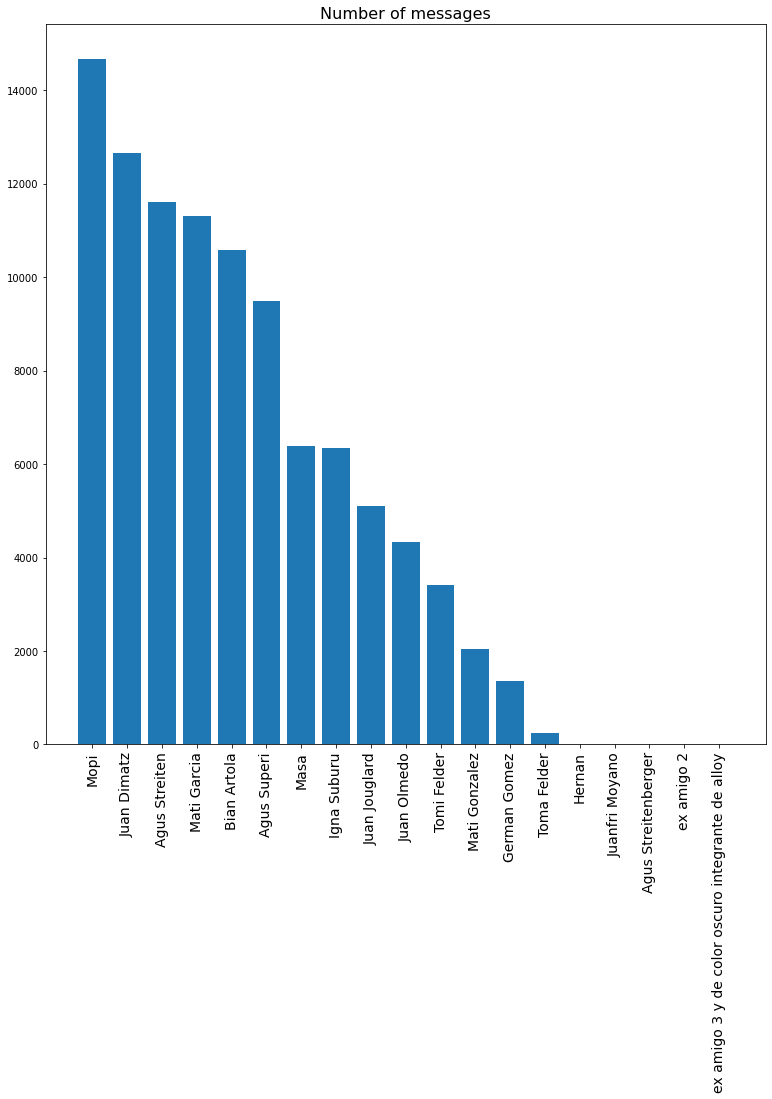

In [31]:
frequency_of_writing = message_counter.most_common()

print(frequency_of_writing)

def plot_bar_char(data, title):
    fig = plt.figure()

    ax = fig.add_axes([0,0,1,1])

    x = [str(item[0]) for item in data]
    y =  [item[1] for item in data]
    ax.bar(x, y)

    plt.title(label=title, fontsize=16)
    plt.xticks(rotation=90, fontsize=14)
    plt.show()

plot_bar_char(frequency_of_writing, "Number of messages")

## Messages per hour

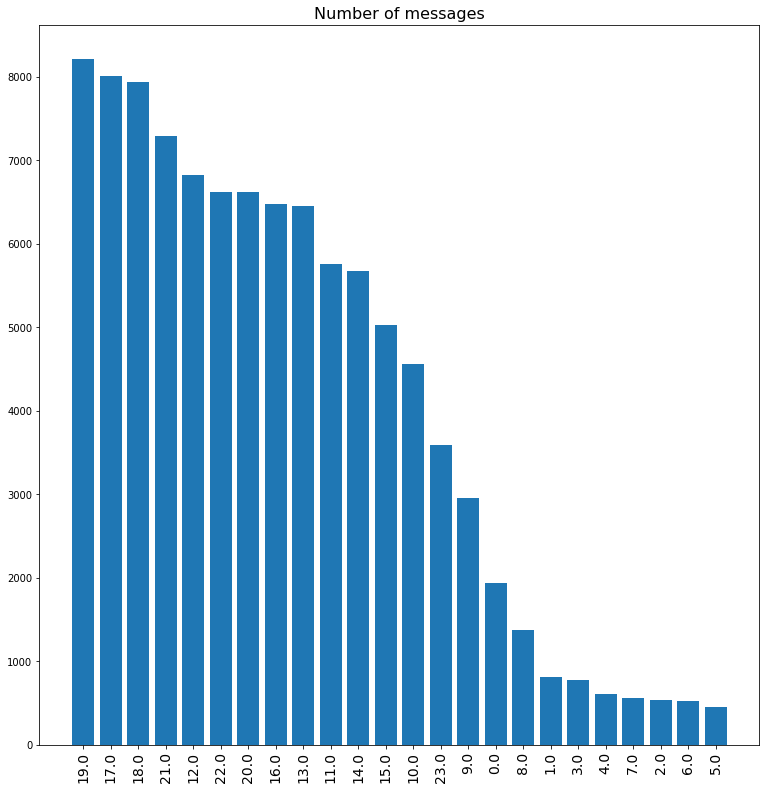

In [33]:
messages_per_hour = Counter(after_process["Hour"]).most_common()

plot_bar_char(messages_per_hour, "Number of messages")

## Messages per day of the week

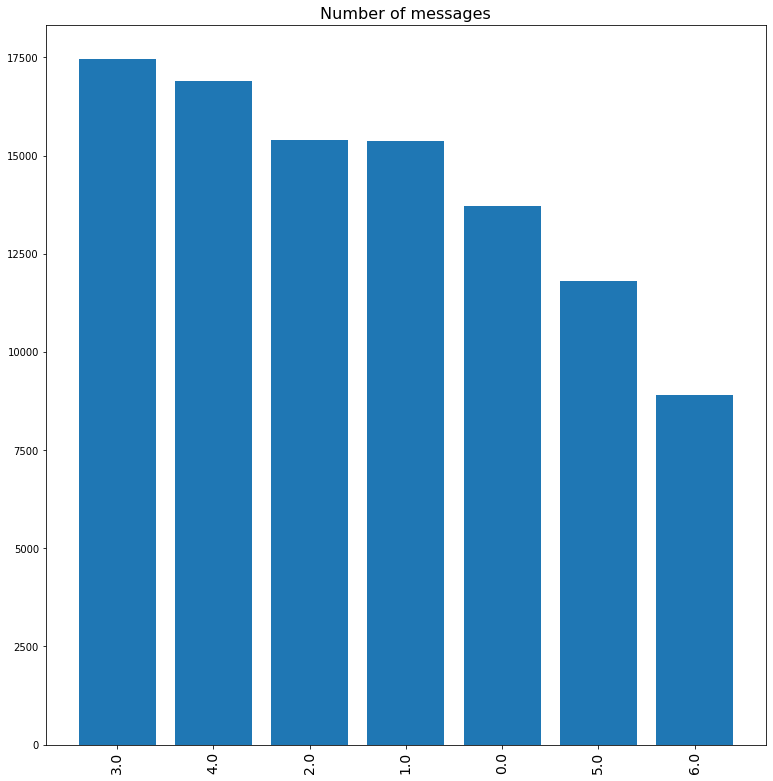

In [35]:
messages_per_hour = Counter(after_process["Day_of_Week"]).most_common()

plot_bar_char(messages_per_hour, "Number of messages")

## Messages per day

Date
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
17    AxesSubplot(0.125,0.125;0.775x0.755)
18    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
21    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
23    

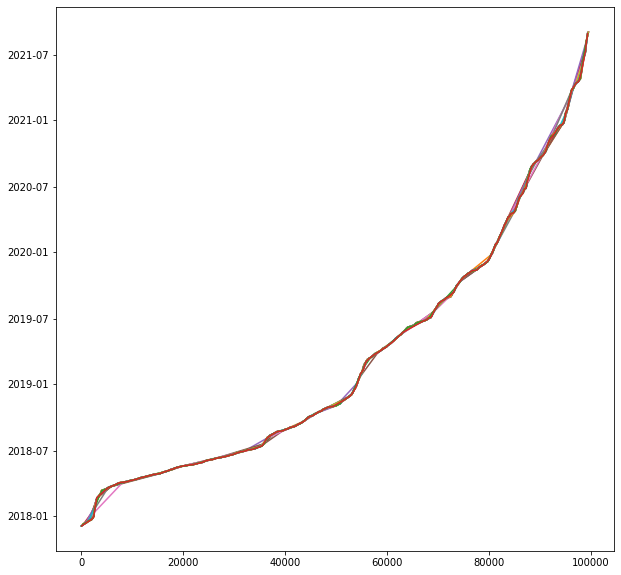

In [48]:
grouped_by_day = after_process.groupby(after_process["Date"].dt.hour)
grouped_by_day["Date"].plot()

## Messages per day

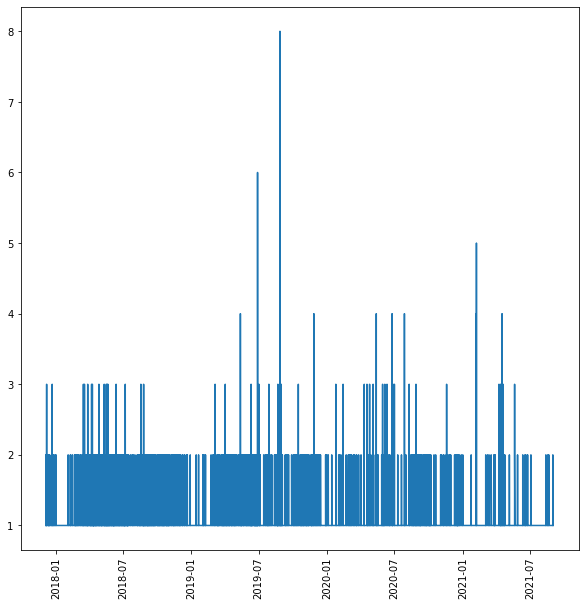

In [31]:
dates = Counter([entry["date"] for entry in after_process]).items()

values = [datapoint[1] for datapoint in dates]
labels = [datapoint[0] for datapoint in dates]

plt.plot(labels, values)
plt.xticks(rotation=90)
plt.show()

In [32]:
message_counter

Counter({'Bian Artola': 10573,
         'Agus Superi': 9482,
         'Tomi Felder': 3403,
         'Igna Suburu': 6335,
         'Agus Streiten': 11609,
         'Mopi': 14675,
         'Juan Dimatz': 12663,
         'Juan Olmedo': 4329,
         'Juan Jouglard': 5098,
         'Mati Garcia': 11317,
         'Mati Gonzalez': 2039,
         'Masa': 6391,
         'German Gomez': 1365,
         'Hernan': 5,
         'Agus Streitenberger': 2,
         'Juanfri Moyano': 3,
         'Toma Felder': 244,
         'ex amigo 2': 1,
         'ex amigo 3 y de color oscuro integrante de alloy': 1})

## Matrix of responses per pair of persons

In [33]:
tuples_of_lines = zip(after_process[2:], after_process[3:])

initial_dict = dict.fromkeys(keys, 0)

matrix_of_responses = {key: initial_dict.copy() for key in keys }

print(matrix_of_responses)
for line in tuples_of_lines:
  questioner = line[0]["name"]
  responder = line[1]["name"]
  matrix_of_responses[responder][questioner] += 1

print(matrix_of_responses)

{'Mati Gonzalez': {'Mati Gonzalez': 0, 'Juan Olmedo': 0, 'Mati Garcia': 0, 'ex amigo 3 y de color oscuro integrante de alloy': 0, 'Agus Streiten': 0, 'ex amigo 2': 0, 'Tomi Felder': 0, 'German Gomez': 0, 'Bian Artola': 0, 'Agus Streitenberger': 0, 'Juan Jouglard': 0, 'Igna Suburu': 0, 'Juanfri Moyano': 0, 'Juan Dimatz': 0, 'Masa': 0, 'Hernan': 0, 'Mopi': 0, 'Agus Superi': 0, 'Toma Felder': 0}, 'Juan Olmedo': {'Mati Gonzalez': 0, 'Juan Olmedo': 0, 'Mati Garcia': 0, 'ex amigo 3 y de color oscuro integrante de alloy': 0, 'Agus Streiten': 0, 'ex amigo 2': 0, 'Tomi Felder': 0, 'German Gomez': 0, 'Bian Artola': 0, 'Agus Streitenberger': 0, 'Juan Jouglard': 0, 'Igna Suburu': 0, 'Juanfri Moyano': 0, 'Juan Dimatz': 0, 'Masa': 0, 'Hernan': 0, 'Mopi': 0, 'Agus Superi': 0, 'Toma Felder': 0}, 'Mati Garcia': {'Mati Gonzalez': 0, 'Juan Olmedo': 0, 'Mati Garcia': 0, 'ex amigo 3 y de color oscuro integrante de alloy': 0, 'Agus Streiten': 0, 'ex amigo 2': 0, 'Tomi Felder': 0, 'German Gomez': 0, 'Bian Ar

In [34]:
#normalize count
for key in matrix_of_responses:
  for inner_key in matrix_of_responses[key]:
    matrix_of_responses[key][inner_key] *= 1 / message_counter[inner_key]



In [35]:
matrix = []

for value in matrix_of_responses.values():
  matrix.append(list(value.values()))

print(matrix)
matrix = np.array(matrix)
with_diagonal = np.fill_diagonal(matrix, 0)

[[0.18391368317802845, 0.02564102564102564, 0.016347088451002915, 0.0, 0.01154276854164872, 0.0, 0.027034969144872176, 0.015384615384615385, 0.022226425801570037, 0.0, 0.016084739113377794, 0.01420678768745067, 0.0, 0.018005212035062782, 0.01267407291503677, 0.0, 0.01614991482112436, 0.01676861421641004, 0.036885245901639344], [0.044629720451201574, 0.2996072996072996, 0.02527171511884775, 0.0, 0.02704798001550521, 0.0, 0.0484866294446077, 0.035164835164835165, 0.03433273432327627, 0.0, 0.044527265594350725, 0.02809786898184688, 0.0, 0.037905709547500596, 0.03802221874511031, 0.0, 0.02684838160136286, 0.02446741193840962, 0.045081967213114756], [0.09367336929867583, 0.07207207207207207, 0.3512414950958735, 0.0, 0.07037643207855974, 0.0, 0.07787246547164267, 0.1282051282051282, 0.09013525016551593, 0.0, 0.09690074539034915, 0.08681925808997631, 0.0, 0.11205875384979863, 0.07088092630261304, 0.0, 0.07161839863713798, 0.06728538283062645, 0.09836065573770492], [0.0, 0.0, 0.0, 0.0, 0.0, 1.

/tmp/ipykernel_3372/2181350262.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
/tmp/ipykernel_3372/2181350262.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


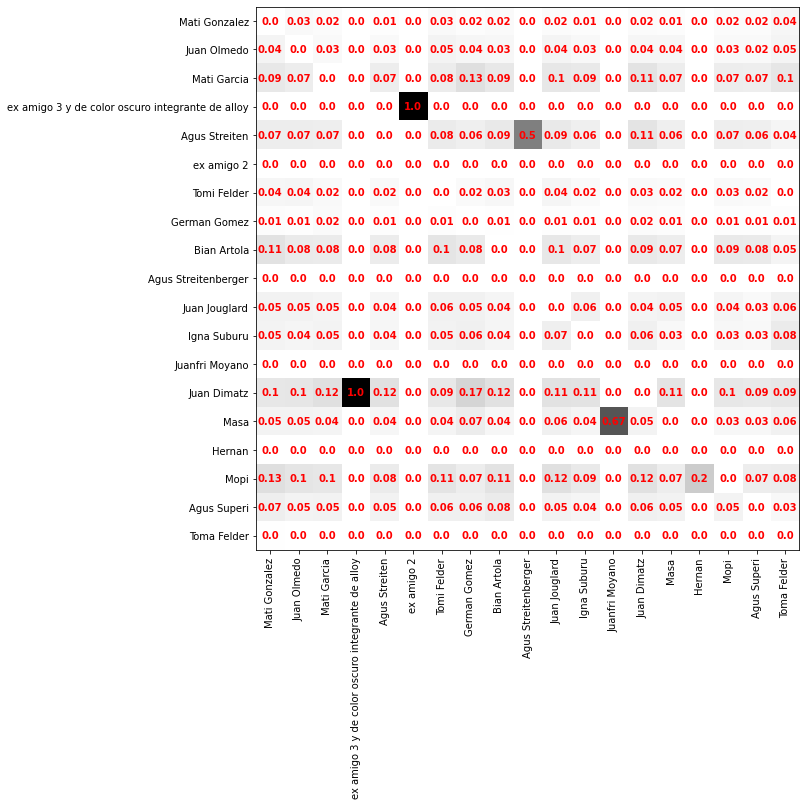

In [36]:
fig, ax = plt.subplots()

def set_ticks(ax, labels, which):
  if which == "x":
    ax.set_xticklabels(labels)
    ax.set_xticks(np.arange(len(labels)))
  else:
    ax.set_yticklabels(labels)
    ax.set_yticks(np.arange(len(labels)))

set_ticks(ax, list(matrix_of_responses.keys()), "x")
set_ticks(ax, list(matrix_of_responses.keys()), "y")

plt.xticks(rotation=90)

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        text = ax.text(j, i, round(matrix[i, j], 2),
                       ha="center", va="center", color="r", fontweight="bold")

ax.imshow(matrix, cmap=plt.cm.binary)
plt.show()

#show responses/total messages

## Average message length for each person

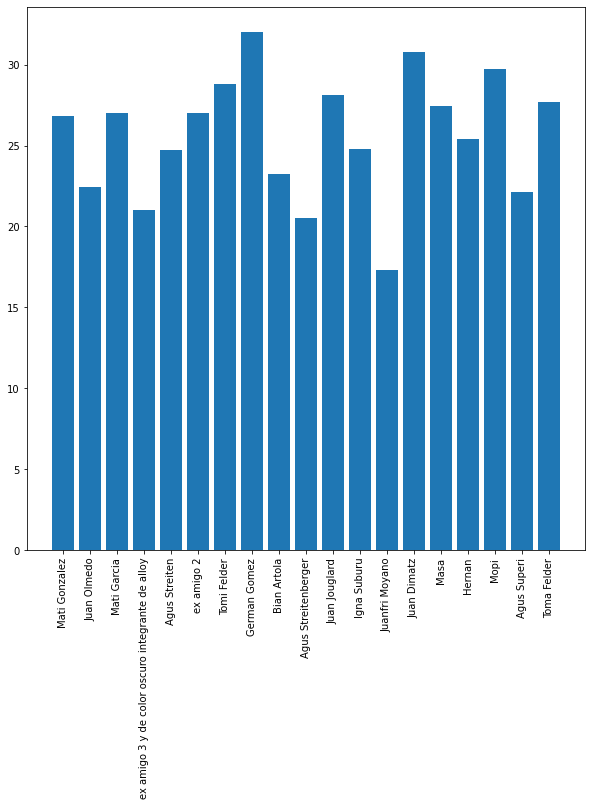

[26.85090730750366, 22.420651420651353, 27.037730847397608, 21.0, 24.714445688689626, 27.0, 28.81075521598614, 31.98534798534788, 23.25905608625749, 20.5, 28.13495488426795, 24.80820836621935, 17.333333333333336, 30.75685066729837, 27.43217023939867, 25.400000000000002, 29.75148211243637, 22.101877241088552, 27.69262295081967]


In [37]:
total_message_length = {key: 0 for key in keys}

for message in after_process:
  total_message_length[message["name"]] += len(message["message"])/message_counter[message["name"]]

plt.bar(list(keys), list(total_message_length.values()))
plt.xticks(rotation=90)
plt.show()


print(list(total_message_length.values()))

## Who laugh the most?

In [38]:
def is_laugh(message):
  reg = re.compile(r"^.*\b[JjeEiIAakKSs]{3,}\b.*$")
  is_jj = re.compile(r"^.*\b[jJ][jJ]\b.*$")
  return bool(reg.match(message)) and bool(not is_jj.match(message))

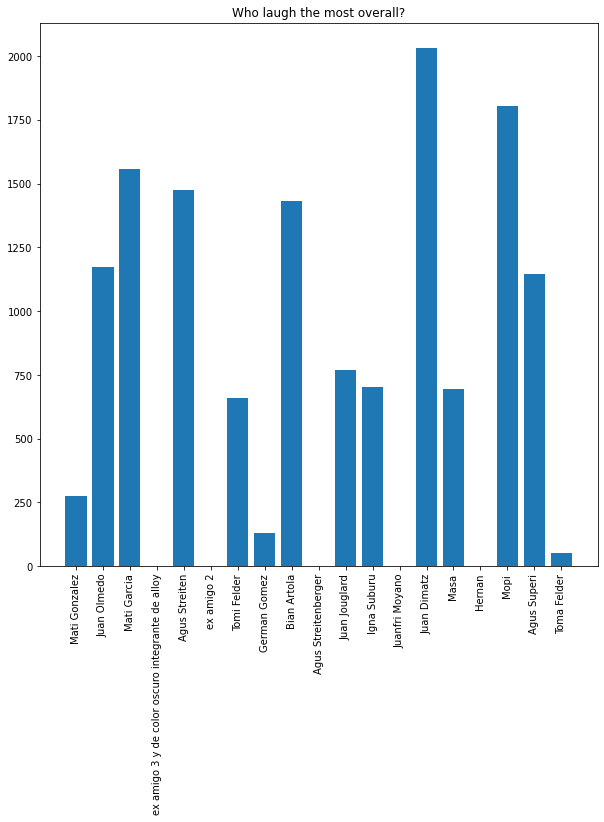

{'Mati Gonzalez': 277, 'Juan Olmedo': 1172, 'Mati Garcia': 1558, 'ex amigo 3 y de color oscuro integrante de alloy': 0, 'Agus Streiten': 1474, 'ex amigo 2': 0, 'Tomi Felder': 661, 'German Gomez': 131, 'Bian Artola': 1430, 'Agus Streitenberger': 0, 'Juan Jouglard': 771, 'Igna Suburu': 701, 'Juanfri Moyano': 1, 'Juan Dimatz': 2030, 'Masa': 693, 'Hernan': 0, 'Mopi': 1804, 'Agus Superi': 1147, 'Toma Felder': 52}


In [39]:
count_laughs = empty_dict_of_names.copy()

for person in messages_grouped_by_person:
  for message in messages_grouped_by_person[person]:
    if is_laugh(message["message"]):
      count_laughs[person] += 1

plt.bar(list(keys), list(count_laughs.values()))
plt.title("Who laugh the most overall?")
plt.xticks(rotation=90)
plt.show()

print(count_laughs)


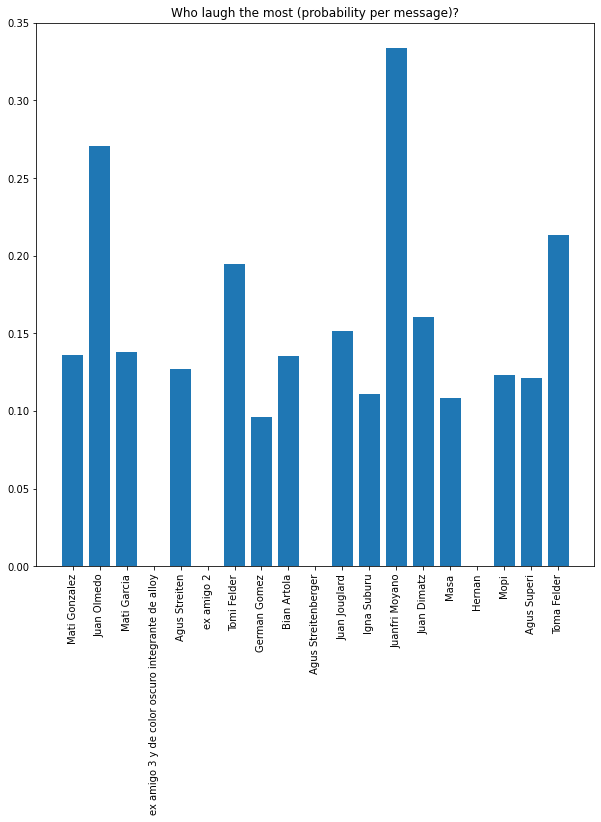

In [40]:

for person in count_laughs:
  count_laughs[person] /= message_counter[person]

plt.bar(list(keys), list(count_laughs.values()))
plt.title("Who laugh the most (probability per message)?")
plt.xticks(rotation=90)
plt.show()

## Mentions matrix

In [41]:
from itertools import chain
count_of_mentions_per_person = empty_dict_of_names.copy()

for person in messages_grouped_by_person:
  individual_count = empty_dict_of_names.copy()
  count_of_mentions_per_person[person] = dict(Counter(list(chain.from_iterable([list(message["mentions"]) for message in messages_grouped_by_person[person]]))))


count_of_mentions_per_person

{'Mati Gonzalez': {'Tomi Felder': 15,
  'Nergo Olmedo': 15,
  'Juanfri Moyano': 24,
  'Massa': 17,
  'Juan Dimatz': 18,
  'Agus Streitenberger': 39,
  'Igna Suburu': 17,
  'Bianca': 18,
  'Ger Gomez': 4,
  'Mati Gonzalez': 1,
  'Mati Garcia': 18,
  'Juan Jouglard': 23,
  'Agus Superi': 10},
 'Juan Olmedo': {'Tomi Felder': 27,
  'Juan Jouglard': 36,
  'Massa': 22,
  'Agus Streitenberger': 22,
  'Igna Suburu': 18,
  'Juanfri Moyano': 15,
  'Nergo Olmedo': 8,
  'Mati Garcia': 24,
  'Mati Gonzalez': 9,
  'Juan Dimatz': 23,
  'Bianca': 18,
  'Ger Gomez': 5,
  'Agus Superi': 6},
 'Mati Garcia': {'Juan Dimatz': 99,
  'Tomi Felder': 70,
  'Ger Gomez': 50,
  'Bianca': 96,
  'Juanfri Moyano': 112,
  'Massa': 82,
  'Mati Gonzalez': 55,
  'Nergo Olmedo': 58,
  'Agus Streitenberger': 49,
  'Igna Suburu': 76,
  'Juan Jouglard': 57,
  'Agus Superi': 22,
  'Mati Garcia': 3},
 'ex amigo 3 y de color oscuro integrante de alloy': {},
 'Agus Streiten': {'Bianca': 137,
  'Tomi Felder': 31,
  'Juan Dimatz':

In [33]:
matrix_of_mentions = []

for mentions in count_of_mentions_per_person.values():
  matrix_of_mentions.append(list(np.array(list(mentions.values())).astype(float)))

#matrix_of_mentions = np.array(matrix_of_mentions)
#np.fill_diagonal(matrix_of_mentions, 0)

matrix_of_mentions

[[35.0, 34.0, 30.0, 39.0, 25.0, 18.0, 38.0, 9.0, 2.0, 31.0, 26.0, 28.0, 18.0],
 [10.0, 25.0, 14.0, 13.0, 11.0, 25.0, 27.0, 15.0, 2.0, 11.0, 9.0, 12.0, 2.0],
 [4.0, 2.0, 9.0, 4.0, 9.0, 14.0, 5.0, 7.0, 14.0, 10.0, 2.0, 1.0],
 [23.0, 34.0, 25.0, 16.0, 25.0, 34.0, 25.0, 3.0, 20.0, 16.0, 42.0, 5.0, 18.0],
 [4.0, 9.0, 16.0, 13.0, 2.0, 13.0, 8.0, 10.0, 3.0, 4.0, 3.0, 9.0, 9.0],
 [15.0, 18.0, 19.0, 4.0, 26.0, 13.0, 11.0, 10.0, 27.0, 14.0, 7.0, 3.0, 1.0],
 [1.0, 20.0, 13.0, 7.0, 11.0, 13.0, 28.0, 22.0, 12.0, 26.0, 13.0, 5.0],
 [25.0, 24.0, 21.0, 31.0, 27.0, 21.0, 14.0, 19.0, 7.0, 9.0, 14.0, 29.0, 2.0],
 [3.0, 2.0, 19.0, 18.0, 4.0, 13.0, 5.0, 7.0, 6.0, 8.0, 9.0, 10.0, 9.0],
 [44.0, 45.0, 24.0, 17.0, 52.0, 42.0, 38.0, 38.0, 10.0, 50.0, 30.0, 10.0, 1.0],
 [13.0, 7.0, 7.0, 22.0, 32.0, 9.0, 9.0, 13.0, 6.0, 1.0, 11.0, 9.0],
 [3.0, 12.0, 7.0, 3.0, 1.0, 4.0, 4.0, 2.0, 1.0],
 [37.0, 60.0, 39.0, 71.0, 26.0, 4.0, 45.0, 22.0, 52.0, 26.0, 43.0, 13.0, 10.0]]

/tmp/ipykernel_3623/2181350262.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
/tmp/ipykernel_3623/2181350262.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/home/juan/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:736: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

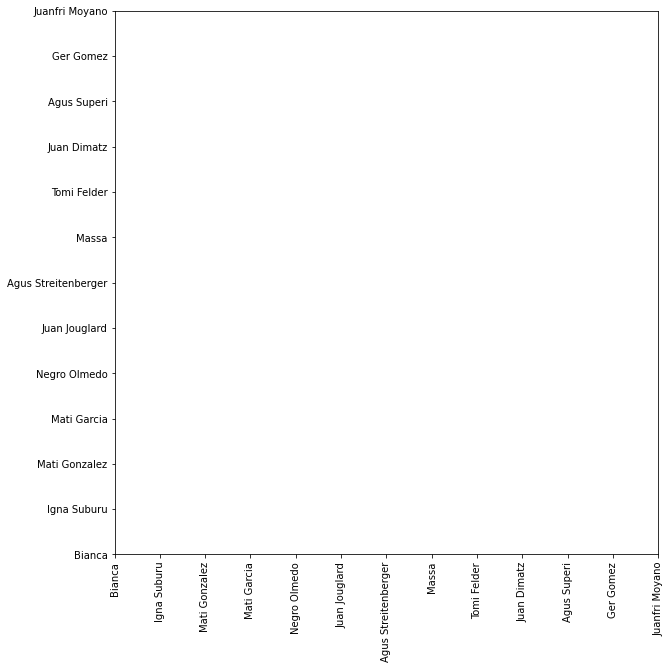

In [34]:
figure, axis = plt.subplots()

set_ticks(axis, list(count_of_mentions_per_person.keys()), "x")
set_ticks(axis, list(count_of_mentions_per_person.keys()), "y")

plt.xticks(rotation=90)

axis.imshow(matrix_of_mentions, cmap=plt.cm.binary)
plt.show()

## Average toxicity by person

In [5]:
get_toxicity("que boludo sos") 

0.09769293

In [38]:
toxic_by_person = empty_dict_of_names.copy()
toxic_by_person


{'Bianca': [0.0011190195,
  0.09706912,
  0.03119389,
  0.0087100305,
  0.016924948,
  0.001204135,
  0.008809469,
  0.0015236295,
  0.025693486,
  0.06967475,
  0.078347065,
  0.01040634,
  0.024570577,
  0.1471315,
  0.44205108,
  0.06345079,
  0.044230416,
  0.22912587,
  0.0007410926,
  0.007860306,
  0.0024371117,
  0.017563228,
  0.086697005,
  0.0021530697,
  0.060876172,
  0.059482012,
  0.004888601,
  0.29045132,
  0.06360286,
  0.013943373,
  0.0006096535,
  0.06580166,
  0.0872333,
  0.0004134154,
  0.025221432,
  0.05458409,
  0.06056601,
  0.11367968,
  0.02558085,
  0.040401075,
  0.103160955,
  0.26562926,
  0.96263605,
  0.029265534,
  0.03847637,
  0.0118605,
  0.00325251,
  0.024383074,
  0.0011607734,
  0.080888376,
  0.014648561,
  0.029287618,
  0.021532554,
  0.037873935,
  0.025394732,
  0.0058300276,
  0.00546038,
  0.060654487,
  0.016055236,
  0.015160639,
  0.01766974,
  0.036692407,
  0.0059915683,
  0.01635008,
  0.00137422,
  0.0125961285,
  0.005921667,
 

### Average Toxicity Per Message

In [62]:
average_toxicity_per_person = empty_dict_of_names.copy()
for person in average_toxicity_per_person:
    average_toxicity_per_person[person] = sum([message["toxicity"] for message in messages_grouped_by_person[person]])/len(messages_grouped_by_person[person])

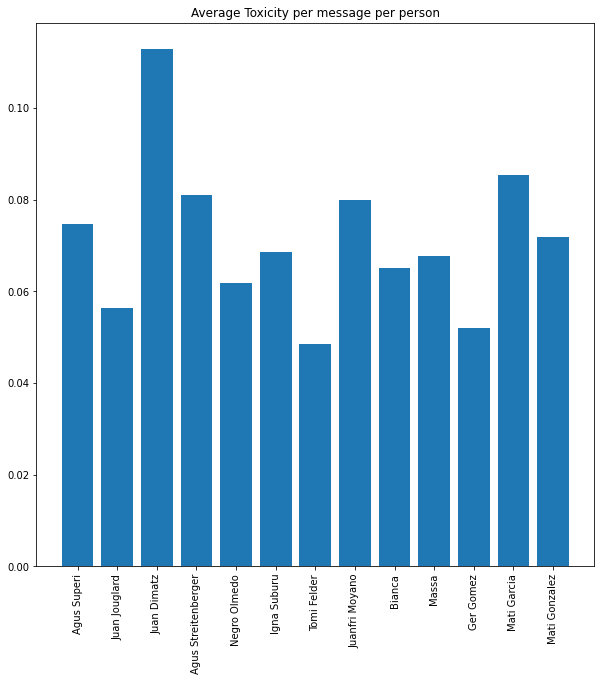

In [63]:

for person in count_laughs:
  count_laughs[person] /= message_counter[person]

plt.bar(list(average_toxicity_per_person.keys()), list(average_toxicity_per_person.values()))
plt.title("Average Toxicity per message per person")
plt.xticks(rotation=90)
plt.show()

### Top 10 most toxic messages

In [64]:
maximum_index = np.argpartition([message["toxicity"] for message in after_process], -10)[-10:]
for index in maximum_index:
    print(f'{after_process[index]["name"]}: {after_process[index]["message"]} - toxicity: {after_process[index]["toxicity"]}')


Agus Streitenberger: la puta q te pario - toxicity: 0.9956026077270508
Agus Streitenberger: la puta q te pario - toxicity: 0.9956026077270508
Agus Streitenberger: retardado de mierda - toxicity: 0.9957375526428223
Massa: a chuparla. me la chupan los americanos - toxicity: 0.9963669776916504
Juan Dimatz: que asco la puta madre - toxicity: 0.9959483742713928
Mati Garcia: cállate la puta que te pario - toxicity: 0.9962454438209534
Agus Streitenberger: para la puta q te pario no se jode con eso - toxicity: 0.9963909983634949
Negro Olmedo: morite larrea hijo de puta - toxicity: 0.996112048625946
Juan Jouglard: que pedazo de hijo de puta - toxicity: 0.9963931441307068
Agus Streitenberger: q te crees q soy millonario la puta q te pario - toxicity: 0.9958745837211609


In [83]:
from nltk.corpus import stopwords
import nltk
spanish_stopwords = stopwords.words("spanish")
spanish_stopwords.extend(["q", "dsp", "si", "<", ">", "multimedia", "omitido", "omitida", "\u200eaudio", "\u200eimagen", "\u200esticker", "\u200evideo", "\u200egif", "", "Hola", "t", "d", ""])

In [55]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/juan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
import spacy
import spacy_spanish_lemmatizer
nlp = spacy.load("es_core_news_sm")

In [46]:
import string

In [47]:
def lemmatize(message):
    return [token.lemma_ for token in nlp(message)]

def remove_word(word):
    return word in spanish_stopwords or is_laugh(word) or len(word) <= 3

def process_message(message):
    return [ token for token in nltk.word_tokenize(message.translate(str.maketrans('', '', string.punctuation))) if not remove_word(token.lower()) ]

In [48]:
process_message("Hola, como estas vos?")

['Hola']

In [88]:
messages_without_stopwords = []
for message in after_process:
    new_message = message.copy()
    new_message["message"] = " ".join(process_message(message["message"]))
    messages_without_stopwords.append(new_message)

## Most frequently used words per person

In [89]:
messages_per_person_without_stopwords = get_empy_dict()
print(messages_per_person_without_stopwords)
for person in messages_grouped_by_person:
    for message in messages_grouped_by_person[person]:
        new_message = process_message(message["message"])
        messages_per_person_without_stopwords[person].extend(new_message)
        

{'Mati Gonzalez': [], 'Juan Olmedo': [], 'Mati Garcia': [], 'ex amigo 3 y de color oscuro integrante de alloy': [], 'Agus Streiten': [], 'ex amigo 2': [], 'Tomi Felder': [], 'German Gomez': [], 'Bian Artola': [], 'Agus Streitenberger': [], 'Juan Jouglard': [], 'Igna Suburu': [], 'Juanfri Moyano': [], 'Juan Dimatz': [], 'Masa': [], 'Hernan': [], 'Mopi': [], 'Agus Superi': [], 'Toma Felder': []}


In [90]:
most_used_words = get_empy_dict()
for person in messages_per_person_without_stopwords:
    most_used_words[person] = Counter(messages_per_person_without_stopwords[person])

In [107]:
most_used_words["Juan Dimatz"].most_common(10)

[('igual', 160),
 ('bien', 157),
 ('cómo', 151),
 ('mañana', 146),
 ('puta', 146),
 ('mierda', 141),
 ('amigo', 135),
 ('ahora', 133),
 ('gracias', 133),
 ('después', 132)]

In [161]:
import itertools
all_documents = [message["message"] for message in messages_without_stopwords]

In [162]:
all_documents[:5]

['', 'escabia', '', '', 'hizo pija']

In [163]:
import gensim.corpora as corpora
import gensim

In [164]:
id2word = corpora.Dictionary(all_documents)
corpus = [id2word.doc2bow(text) for text in all_documents]
# number of topics
num_topics = 100

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [160]:
lda_model.print_topics()

[(62,
  '0.035*"@" + 0.032*"?" + 0.020*"," + 0.014*"/" + 0.011*"ver" + 0.011*"viejo" + 0.008*"5492915079528" + 0.008*"hora" + 0.008*"decir" + 0.008*"5492914756335"'),
 (39,
  '0.026*"," + 0.018*"amigo" + 0.014*"👏" + 0.013*"/" + 0.009*"!" + 0.009*"@" + 0.009*"deber" + 0.009*":" + 0.009*"saber" + 0.009*"?"'),
 (80,
  '0.027*"," + 0.025*"ir" + 0.021*"🏻" + 0.014*"/" + 0.010*"👏" + 0.010*"💪" + 0.010*"poder" + 0.007*"ser" + 0.007*"dos" + 0.007*"decir"'),
 (66,
  '0.043*"`" + 0.038*"💚" + 0.031*"\'\'" + 0.010*"habiar" + 0.010*"ver" + 0.010*"mas" + 0.005*"dielectrico" + 0.005*"agarrado" + 0.005*"acá" + 0.005*"chabon"'),
 (70,
  '0.024*"," + 0.014*"🏼" + 0.013*"🏼\u200d" + 0.013*"♂" + 0.013*"🤦" + 0.010*"🙌" + 0.008*"4" + 0.008*"uns" + 0.008*"docente" + 0.008*"ir"'),
 (34,
  '0.037*"👏" + 0.037*"🏻" + 0.027*"!" + 0.015*"," + 0.015*"🙌" + 0.015*"🏾" + 0.011*"?" + 0.011*"@" + 0.011*"felicitación" + 0.011*"amigo"'),
 (98,
  '0.103*"!" + 0.012*"," + 0.012*"gracias" + 0.012*"pasar" + 0.011*"querer" + 0.011*".